In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(18, 12))

from matplotlib import rcParams
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

# Données gouv 

## Importation des données

In [ ]:
data = pd.read_csv('https://static.data.gouv.fr/resources/prix-moyen-au-m2-des-ventes-de-maisons-et-dappartements-par-commune-en-2019/20210225-161247/prixm2-loyer-communes-2019.csv')
data.head(10)

X                        ID INSEE_COM INSEE_DEP  INSEE_REG  CODE_EPCI  \
0  23997  ARR_MUNI0000000009736033     75120        75         11        NaN   
1  23507  ARR_MUNI0000000009736034     75119        75         11        NaN   
2  13728  ARR_MUNI0000000009736035     75111        75         11        NaN   
3    976  ARR_MUNI0000000009736040     75118        75         11        NaN   
4   4795  ARR_MUNI0000000009736041     75117        75         11        NaN   
5  31197  ARR_MUNI0000000009736042     75110        75         11        NaN   
6  17686  ARR_MUNI0000000009736043     75109        75         11        NaN   
7  12779  ARR_MUNI0000000009736044     75108        75         11        NaN   
8  17740  ARR_MUNI0000000009736045     75103        75         11        NaN   
9  34168  ARR_MUNI0000000009736046     75102        75         11        NaN   

                  NOM_COM_M  POPULATION  Nb_Ventes  PrixMoyen_M2  \
0  PARIS 20E ARRONDISSEMENT      195604       2039          8604   
1  PARIS 19E ARRONDISSEMENT      186393       1838          8263   
2  PARIS 11E ARRONDISSEMENT      147017       1127          9819   
3  PARIS 18E ARRONDISSEMENT      195060       3503          9162   
4  PARIS 17E ARRONDISSEMENT      167835       2775         10205   
5  PARIS 10E ARRONDISSEMENT       91932       1583          9790   
6   PARIS 9E ARRONDISSEMENT       59629       1099         10631   
7   PARIS 8E ARRONDISSEMENT       36453        623         10858   
8   PARIS 3E ARRONDISSEMENT       34788        619         11144   
9   PARIS 2E ARRONDISSEMENT       20260        496         10833   

   PrixMoyen_M2_1819  loyer_apparts  loyer_maisons  R2appart  R2maison  
0        8333.889908      25.218065      25.531480  0.852356  0.742222  
1        8065.033908      25.184404      24.829411  0.846309  0.742222  
2        9534.497086      29.223528      30.939697  0.878908  0.780490  
3        8865.722421      27.585489      28.273577  0.829814  0.742222  
4        9910.312961      30.177892      30.443554  0.934215  0.842951  
5        9460.292823      28.912789      30.939697  0.893343  0.780490  
6       10298.300045      31.617569      30.939697  0.916845  0.780490  
7       10587.000000      35.002977      30.939697  0.906289  0.780490  
8       10866.813900      34.206456      30.939697  0.886520  0.780490  
9       10582.294416      34.023825      30.939697  0.868138  0.780490

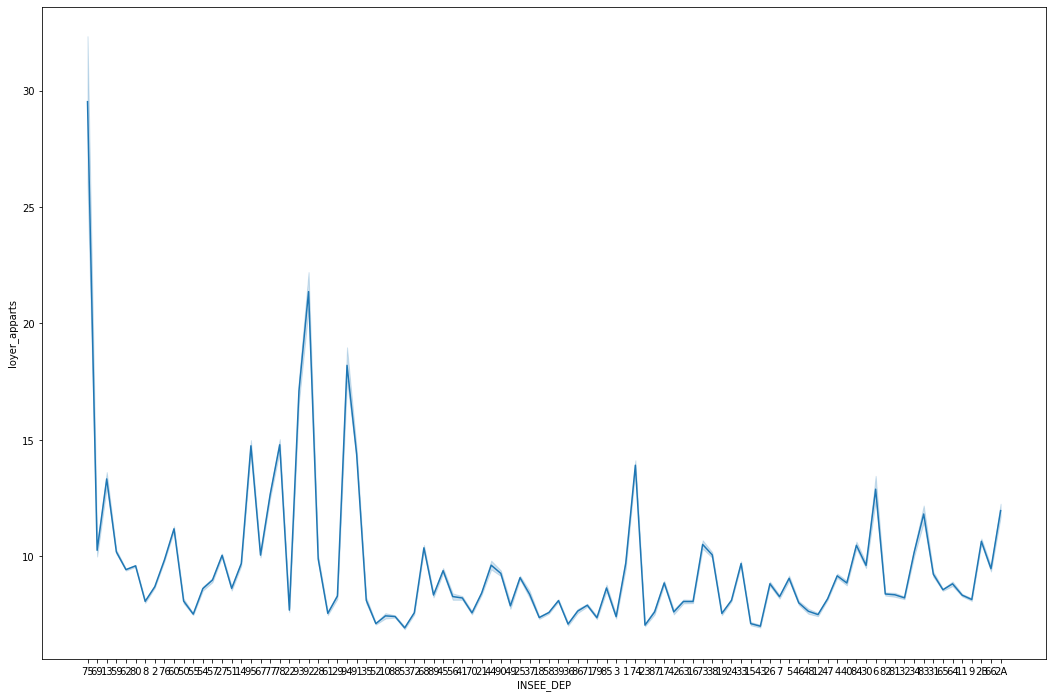

In [ ]:
# Visual Python: Visualization > Seaborn
sns.lineplot(data=data, x='INSEE_DEP', y='loyer_apparts')
plt.show()

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

In [ ]:
cp = data['INSEE_DEP'];
loyer_apparts = data['loyer_apparts'];
prixm2 = data['PrixMoyen_M2'];

p = figure(title="", x_axis_label="Loyer appart / m2", y_axis_label="CP", sizing_mode='stretch_both')

p.vbar(x=loyer_apparts, top=cp, color="blue", width=0.1, bottom=0,)
p.circle(loyer_apparts, prixm2/120, color="red", size=6, legend_label="Prix vente m2 / 60")
show(p)

## Importation des code postaux

In [ ]:
postal_code = pd.read_csv('/content/laposte_hexasmal.csv', sep=";")
postal_code.head(5)

code_commune_insee   nom_de_la_commune  code_postal            ligne_5  \
0              01014              ARBENT         1100                NaN   
1              01036  VALROMEY SUR SERAN         1260  BELMONT LUTHEZIEU   
2              01036  VALROMEY SUR SERAN         1260          FITIGNIEU   
3              01036  VALROMEY SUR SERAN         1260           LOMPNIEU   
4              01036  VALROMEY SUR SERAN         1260          LUTHEZIEU   

  libelle_d_acheminement           coordonnees_gps  
0                 ARBENT  46.283607621,5.690755574  
1     VALROMEY SUR SERAN  45.918185011,5.656884824  
2     VALROMEY SUR SERAN  45.918185011,5.656884824  
3     VALROMEY SUR SERAN  45.918185011,5.656884824  
4     VALROMEY SUR SERAN  45.918185011,5.656884824

## Merge des données avec les codes postaux

In [ ]:
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, show
from bokeh.io import output_notebook
output_notebook()

In [ ]:
df_gouv = data.merge(postal_code, left_on='INSEE_COM', right_on='code_commune_insee')
df_gouv[['latitude', 'longitude']] = df_gouv['coordonnees_gps'].str.split(',', expand=True)
df_gouv['latitude'] = df_gouv['latitude'].astype(float)
df_gouv['longitude'] = df_gouv['longitude'].astype(float)
df_gouv.head()

X                        ID INSEE_COM INSEE_DEP  INSEE_REG  CODE_EPCI  \
0  23997  ARR_MUNI0000000009736033     75120        75         11        NaN   
1  23507  ARR_MUNI0000000009736034     75119        75         11        NaN   
2  13728  ARR_MUNI0000000009736035     75111        75         11        NaN   
3    976  ARR_MUNI0000000009736040     75118        75         11        NaN   
4   4795  ARR_MUNI0000000009736041     75117        75         11        NaN   

                  NOM_COM_M  POPULATION  Nb_Ventes  PrixMoyen_M2  ...  \
0  PARIS 20E ARRONDISSEMENT      195604       2039          8604  ...   
1  PARIS 19E ARRONDISSEMENT      186393       1838          8263  ...   
2  PARIS 11E ARRONDISSEMENT      147017       1127          9819  ...   
3  PARIS 18E ARRONDISSEMENT      195060       3503          9162  ...   
4  PARIS 17E ARRONDISSEMENT      167835       2775         10205  ...   

   R2appart  R2maison  code_commune_insee  nom_de_la_commune  code_postal  \
0  0.852356  0.742222               75120           PARIS 20        75020   
1  0.846309  0.742222               75119           PARIS 19        75019   
2  0.878908  0.780490               75111           PARIS 11        75011   
3  0.829814  0.742222               75118           PARIS 18        75018   
4  0.934215  0.842951               75117           PARIS 17        75017   

  ligne_5 libelle_d_acheminement           coordonnees_gps   latitude  \
0     NaN                  PARIS  48.863457789,2.401155799  48.863458   
1     NaN                  PARIS  48.887051437,2.384822082  48.887051   
2     NaN                  PARIS  48.859054908,2.380025153  48.859055   
3     NaN                  PARIS  48.892570317,2.348176598  48.892570   
4     NaN                  PARIS  48.887331019,2.306778316  48.887331   

  longitude  
0  2.401156  
1  2.384822  
2  2.380025  
3  2.348177  
4  2.306778  

[5 rows x 23 columns]

## Affichage des colones traitables

In [ ]:
for col in df_gouv.columns.tolist():
  print(col)

X
ID
INSEE_COM
INSEE_DEP
INSEE_REG
CODE_EPCI
NOM_COM_M
POPULATION
Nb_Ventes
PrixMoyen_M2
PrixMoyen_M2_1819
loyer_apparts
loyer_maisons
R2appart
R2maison
code_commune_insee
nom_de_la_commune
code_postal
ligne_5
libelle_d_acheminement
coordonnees_gps
latitude
longitude


## Nombres de lignes traitables

In [ ]:
print(df_gouv.count())

X                         35284
ID                        35284
INSEE_COM                 35284
INSEE_DEP                 35284
INSEE_REG                 35284
CODE_EPCI                 35222
NOM_COM_M                 35284
POPULATION                35284
Nb_Ventes                 35284
PrixMoyen_M2              35284
PrixMoyen_M2_1819         31056
loyer_apparts             35284
loyer_maisons             35284
R2appart                  35284
R2maison                  35284
code_commune_insee        35284
nom_de_la_commune         35284
code_postal               35284
ligne_5                    4076
libelle_d_acheminement    35284
coordonnees_gps           35284
latitude                  35284
longitude                 35284
dtype: int64


## Affichage de tous les points sur la carte

In [ ]:
map_options = GMapOptions(lat=46, lng=2, map_type="roadmap", zoom=6)
p = gmap("gmap_api_key_here", map_options, title="France", sizing_mode='stretch_both')
source = ColumnDataSource(
    data=dict(lat=df_gouv['latitude'].tolist(),
              lon=df_gouv['longitude'].tolist())
)
p.circle(x="lon", y="lat", size=3, fill_color="blue", fill_alpha=0.8, source=source)
show(p)

## Affichage des données sur la carte en fonction du Prix Moyen au m2

In [ ]:
from bokeh.palettes import viridis
from bokeh.models import LinearColorMapper
from bokeh.models import ColorBar

map_options = GMapOptions(lat=46, lng=2, map_type="roadmap", zoom=6)
p = gmap("gmap_api_key_here", map_options, title="France - Prix m2", sizing_mode='stretch_both')
source = ColumnDataSource(
    data=dict(lat=df_gouv['latitude'].tolist(),
              lon=df_gouv['longitude'].tolist(),
              PrixMoyen_M2=df_gouv['PrixMoyen_M2'].tolist())
)

color_mapper = LinearColorMapper(palette=viridis(256), low=min(df_gouv['PrixMoyen_M2']), high=max(df_gouv['PrixMoyen_M2']))
p.circle(x="lon", y="lat", size=3, color={'field': 'PrixMoyen_M2', 'transform': color_mapper}, fill_alpha=0.8, source=source)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

show(p)

## Affichage des données sur la carte en fonction du Prix Moyen des Loyers des Appartement

In [ ]:
map_options = GMapOptions(lat=46, lng=2, map_type="roadmap", zoom=6)
p = gmap("gmap_api_key_here", map_options, title="France - Prix Loyer Appartement", sizing_mode='stretch_both')
source = ColumnDataSource(
    data=dict(lat=df_gouv['latitude'].tolist(),
              lon=df_gouv['longitude'].tolist(),
              loyer_apparts=df_gouv['loyer_apparts'].tolist())
)

color_mapper = LinearColorMapper(palette=viridis(256), low=min(df_gouv['loyer_apparts']), high=max(df_gouv['loyer_apparts']))
p.circle(x="lon", y="lat", size=3, color={'field': 'loyer_apparts', 'transform': color_mapper}, fill_alpha=0.8, source=source)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

show(p)

## Transformation des données "loyer_apparts" et "PrixMoyen_M2" en indice de 0 à 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_gouv['PrixMoyen_M2_scaled'] = scaler.fit_transform(df_gouv[['PrixMoyen_M2']])
df_gouv['loyer_apparts_scaled'] = scaler.fit_transform(df_gouv[['loyer_apparts']])

## Affichage de la carte - Différences entre Cout à l'achat et Prix de la location

In [ ]:
difference = df_gouv["PrixMoyen_M2_scaled"] - df_gouv["loyer_apparts_scaled"]
map_options = GMapOptions(lat=46, lng=2, map_type="roadmap", zoom=6)
p = gmap("gmap_api_key_here", map_options, title="France - Diff", sizing_mode='stretch_both')
source = ColumnDataSource(
    data=dict(lat=df_gouv['latitude'].tolist(),
              lon=df_gouv['longitude'].tolist(),
              color=difference.tolist())
)
color_mapper = LinearColorMapper(palette=viridis(256), low=min(difference), high=max(difference))
p.circle(x="lon", y="lat", size=3, color={'field': 'color', 'transform': color_mapper}, fill_alpha=0.8, source=source)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

show(p)

# Données AirBnb

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Scraping des annonces AirBnb des villes contenues dans le tableau cities_to_scrap

In [ ]:
base_url = "https://www.airbnb.fr"
cities_to_scrap = ['Paris', 'Lyon', 'Marseille', 'Nice', 'Toulouse']
dataframes = []

for city in cities_to_scrap:
    titles = []
    prices = []
    locations = []
    url = "/s/"+city+"/homes"
    while 1>0:
        response = requests.get(base_url+url)
        soup = BeautifulSoup(response.text, "html.parser")
        homes = soup.find_all("div", class_="c4mnd7m")
        for home in homes:
            title = home.find("div", class_="t1jojoys").get_text()
            price = home.find("div", class_="_1jo4hgw").get_text()
            location = title.split("⋅")[1].strip()
            titles.append(title)
            prices.append(price)
            locations.append(location)
        next_button = soup.find('a', attrs={"aria-label": "Suivant"})
        if next_button:
            url = next_button.get("href")
        else:
            break
    dataframes.append(pd.DataFrame({"title": titles, "price": prices, "location": locations}))

df_airbnb = pd.concat(dataframes, ignore_index=True)

## Recuperation du nombre (prix par nuit) de la colonne price

In [ ]:
import re

def extract_price(price_str):
    return int(re.findall(r'\d+', price_str)[0])

df_airbnb['price'] = df_airbnb['price'].apply(lambda x: extract_price(x))

In [ ]:
print(df_airbnb.count())

title       1350
price       1350
location    1350
dtype: int64


In [ ]:
df_airbnb.head()

title  price        location
0  Appartement ⋅ Ivry-sur-Seine     66  Ivry-sur-Seine
1           Appartement ⋅ Paris    163           Paris
2           Appartement ⋅ Paris     99           Paris
3           Appartement ⋅ Paris    123           Paris
4        Chambre privée ⋅ Paris     40           Paris

## Ajout des coordonnées GPS dans le dataframe df_airbnb grace à la librairie geopy

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

def get_location_coordinates(address):
    location = geolocator.geocode(address)
    return (location.latitude, location.longitude)

In [ ]:
location_coordinates = {}
df_airbnb["latitude"] = None
df_airbnb["longitude"] = None

for index, row in df_airbnb.iterrows():
    location = row["location"]
    if location in location_coordinates:
        lat, lon = location_coordinates[location]
    else:
        lat, lon = get_location_coordinates(location)
        location_coordinates[location] = (lat, lon)
    df_airbnb.at[index, "latitude"] = lat
    df_airbnb.at[index, "longitude"] = lon

In [ ]:
df_airbnb.head()

title  price        location  latitude longitude
0  Appartement ⋅ Ivry-sur-Seine     66  Ivry-sur-Seine  48.81223  2.387253
1           Appartement ⋅ Paris    163           Paris  48.85889  2.320041
2           Appartement ⋅ Paris     99           Paris  48.85889  2.320041
3           Appartement ⋅ Paris    123           Paris  48.85889  2.320041
4        Chambre privée ⋅ Paris     40           Paris  48.85889  2.320041

## Affichage des points sur la carte

In [ ]:
map_options = GMapOptions(lat=46, lng=2, map_type="roadmap", zoom=6)
p = gmap("gmap_api_key_here", map_options, title="France", sizing_mode='stretch_both')
source = ColumnDataSource(
    data=dict(lat=df_airbnb['latitude'].tolist(),
              lon=df_airbnb['longitude'].tolist())
)
p.circle(x="lon", y="lat", size=6, fill_color="blue", fill_alpha=0.8, source=source)
show(p)

## Affichage des points sur la carte en fonction du prix 

In [ ]:
# Extract the numerical part of the price and convert to integer
df_airbnb['price'] = df_airbnb['price'].astype(str)
df_airbnb['price'] = df_airbnb['price'].str.extract(r'(\d+)').astype(int)

In [ ]:
from bokeh.transform import linear_cmap
from bokeh.models import ColorBar

map_options = GMapOptions(lat=46, lng=2, map_type="roadmap", zoom=6)
p = gmap("gmap_api_key_here", map_options, title="France", sizing_mode='stretch_both')
source = ColumnDataSource(
    data=dict(lat=df_airbnb['latitude'].tolist(),
              lon=df_airbnb['longitude'].tolist(),
              price=df_airbnb['price'].tolist()
              )
)

# Define the color map based on the 'price' column
color_map = linear_cmap(field_name='price', palette='Viridis256', low=df_airbnb['price'].min(), high=df_airbnb['price'].max())

# Add the circle plot to the map with the fill_color parameter set to the color_map
p.circle(x="lon", y="lat", size=6, fill_color=color_mapper, fill_alpha=0.8, source=source)

# Create the color bar
color_bar = ColorBar(color_mapper=color_map['transform'], location=(0, 0))
p.add_layout(color_bar, 'right')

# Show the map
show(p)
